In [1]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

# Read the data file
data = pd.read_csv("USD_LKR_Dataset.csv")

# Change the index of the file
data.index = pd.to_datetime(data['Date'])
data.drop(['Date'], inplace=True, axis='columns')
data.head()

,Price,Open,High,Low,Change %
Date,,,,,
1979-12-26,15.552,15.552,15.552,15.552,0.00%
1979-12-27,15.552,15.552,15.552,15.552,0.00%
1979-12-28,15.552,15.552,15.552,15.552,0.00%
1979-12-31,15.552,15.552,15.552,15.552,0.00%
1980-01-02,15.552,15.552,15.552,15.552,0.00%


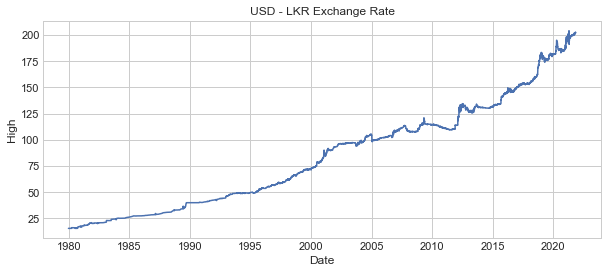

In [2]:
# Visualize the data
plt.figure(figsize=(10, 4))
plt.title("USD - LKR Exchange Rate")
plt.xlabel("Date")
plt.ylabel("High")
plt.plot(data["High"])
plt.show()

          Price      Open      High       Low
Price  1.000000  0.999985  0.999987  0.999989
Open   0.999985  1.000000  0.999988  0.999990
High   0.999987  0.999988  1.000000  0.999976
Low    0.999989  0.999990  0.999976  1.000000


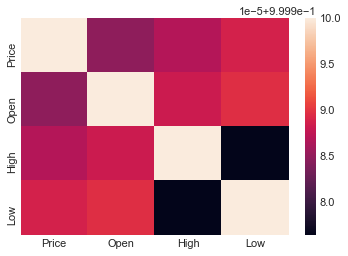

In [3]:
# Visualize the data
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [4]:
# Filter the data
x = data[["Open", "Low"]]
y = data["High"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [5]:
# Split the data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the ML Model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [6]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0      111.960000
1       25.130000
2       20.900000
3       71.388889
4       87.825000


In [33]:
# Check the accuracy
score = model.score(xtest, ytest)
print(score)

0.9999793068214515
